# Credit card eligibility dataset EDA

https://www.kaggle.com/datasets/rohit265/credit-card-eligibility-data-determining-factors/data

## Data checks
- Check rows count, columns count
- Summary statistics
- Check NULLs
- Check duplicates

In [1]:
import pandas as pd
import os
os.chdir('/workspaces/credit-card-eligibility/')

In [2]:
data = pd.read_csv('notebooks/dataset.csv')
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
# Check number of rows and columns
data.shape

(9709, 20)

In [4]:
# Get summary statistics
data.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [5]:
# Check NULLs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [6]:
data.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [7]:
data.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [8]:
# Check duplicates
data.duplicated('ID').value_counts()

False    9709
Name: count, dtype: int64

## Visualizations

- To better understand the data, I create some bar plots that show the distribution of the data by each column

In [9]:
import matplotlib.pyplot as plt

from lib.eda import (
    plot_category_frequency,
    get_labels_values_for_plot,
    get_cut_bins_from_labels,
    Labels
)

In [10]:
%load_ext autoreload
%autoreload 2

### Convert some continuous variables into categorical variables for plotting

In [17]:
continuous_cols = ['Age', 'Account_length', 'Total_income', 'Years_employed']

for column in continuous_cols:
    cut_bins = get_cut_bins_from_labels(Labels.CATEGORICAL_LABELS[column])
    data[f'{column}_bucket'] = pd.cut(
        data[column],
        bins=cut_bins, 
        labels=Labels.CATEGORICAL_LABELS[column],
        include_lowest=True
    )

### Plot the distribution of each column

- Look at the value counts of each column to identify any trend and pattern

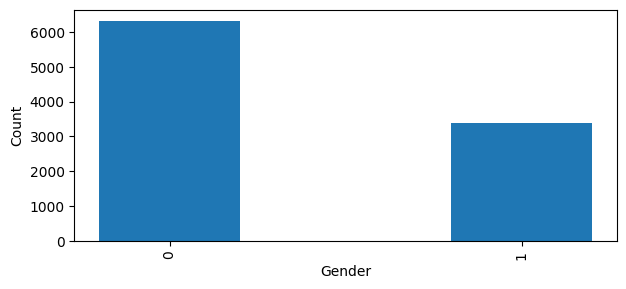

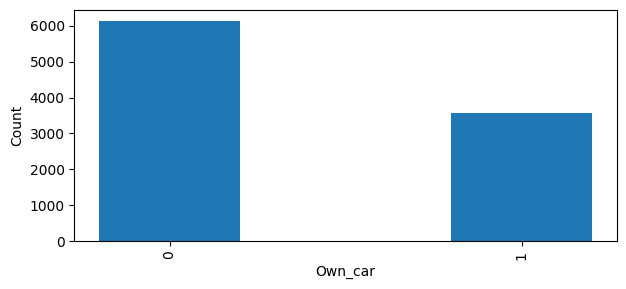

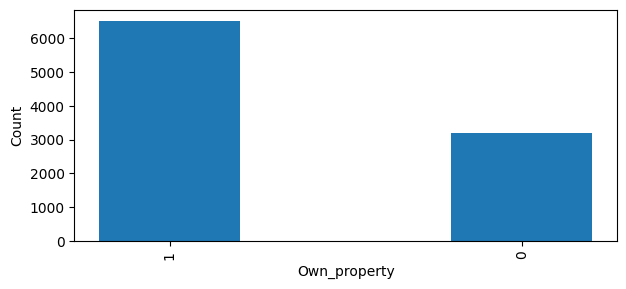

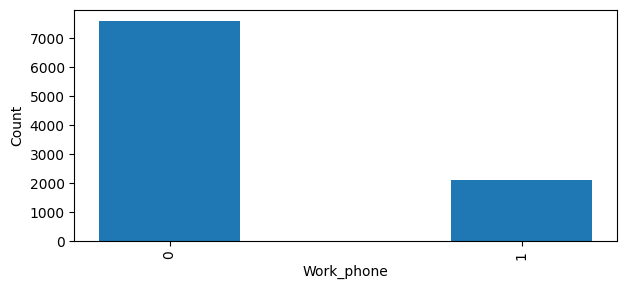

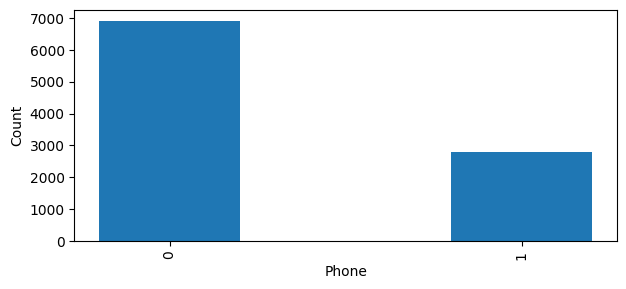

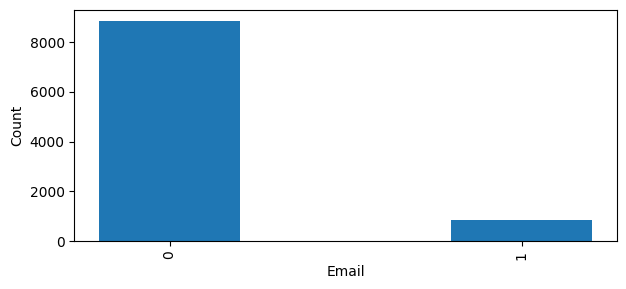

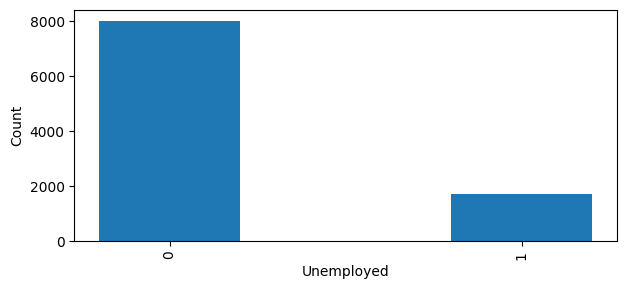

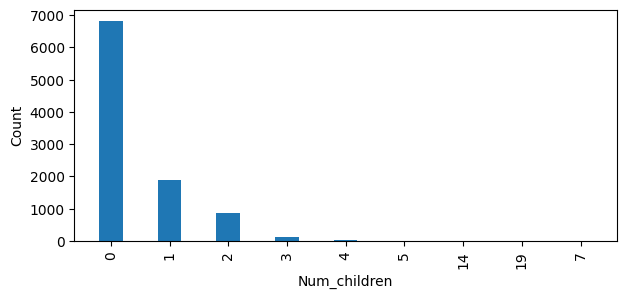

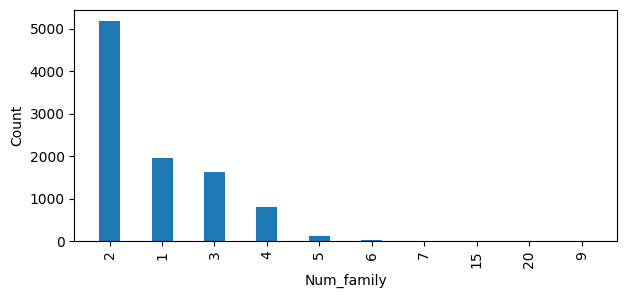

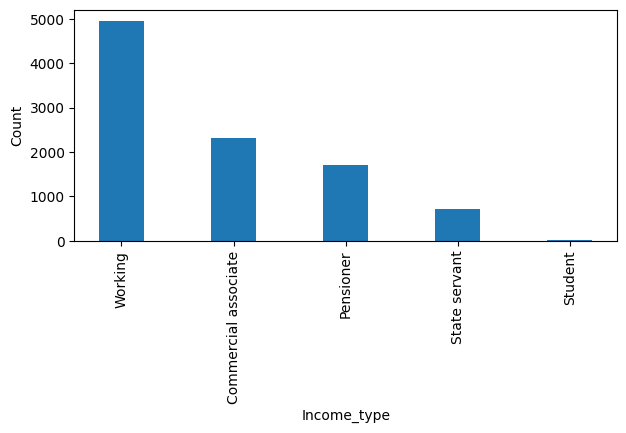

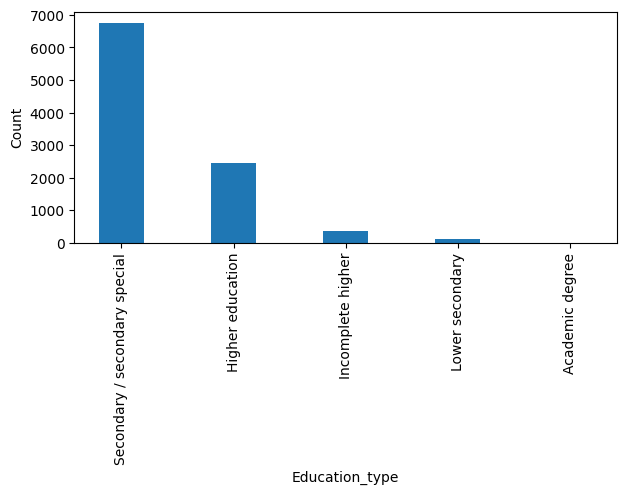

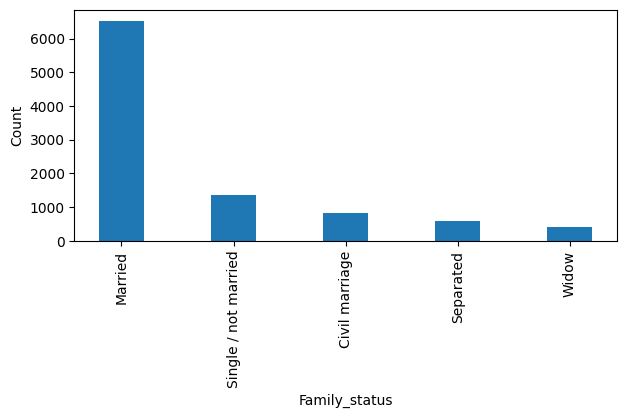

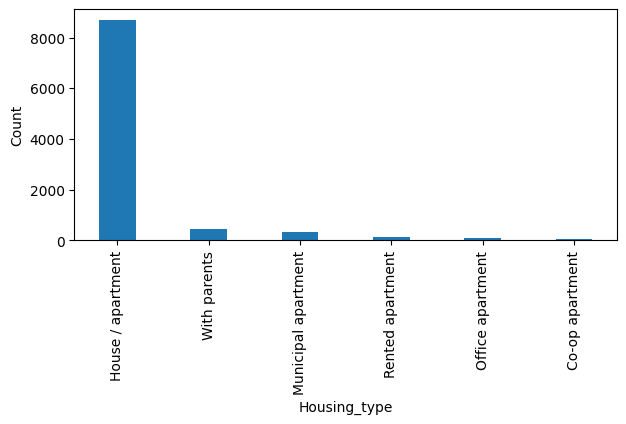

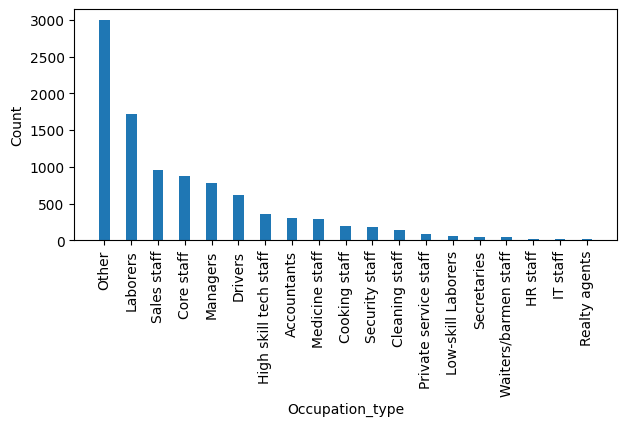

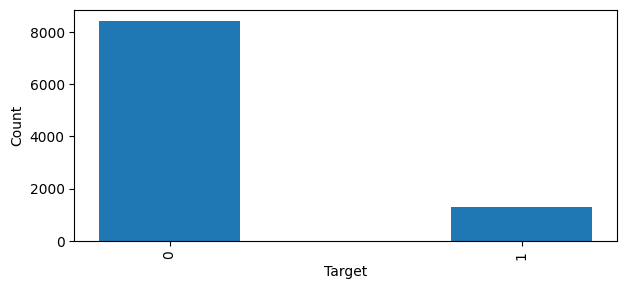

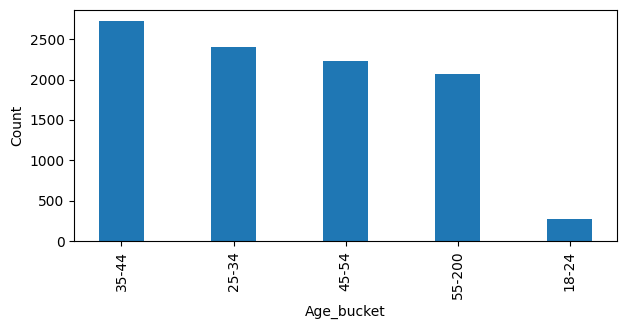

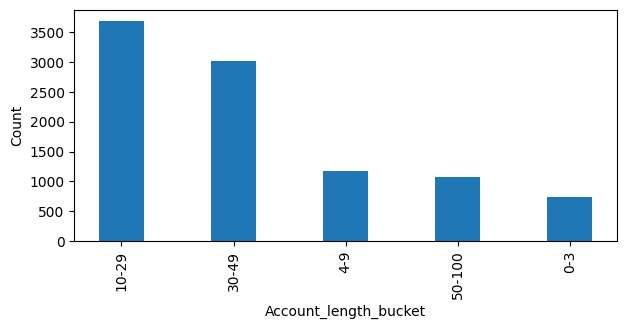

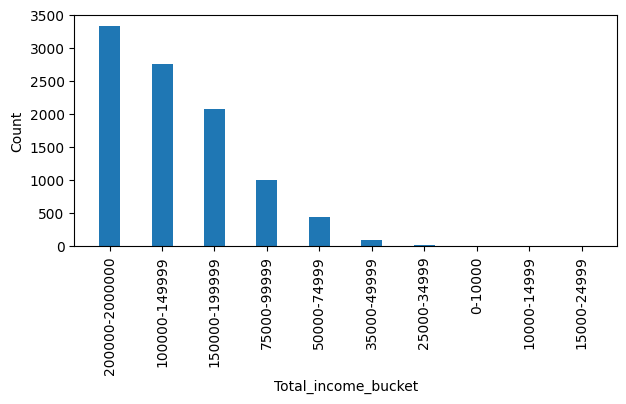

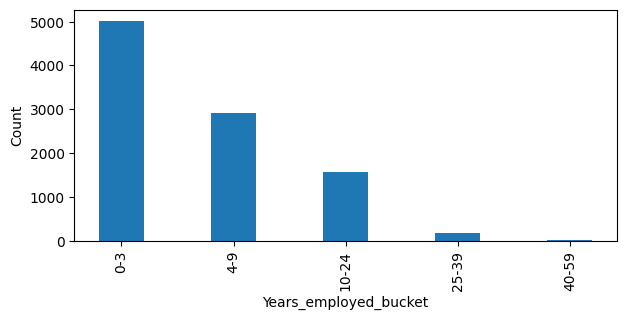

In [22]:
id_column = ['ID']
for column in data.columns:
    if column not in id_column + continuous_cols:
        plot_category_frequency(data, column)

Text(0.5, 1.0, 'Total Income Vs Age between Not Eligible and Eligible')

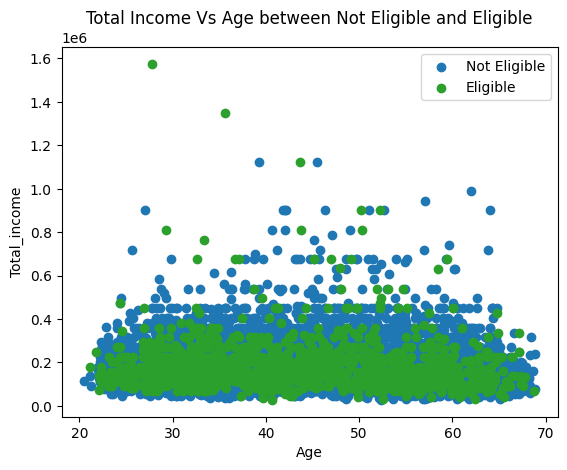

In [23]:
plt.scatter(x=data[data['Target'] == 0]['Age'], y = data[data['Target'] == 0]['Total_income'], color = 'tab:blue')
plt.scatter(x=data[data['Target'] == 1]['Age'], y = data[data['Target'] == 1]['Total_income'], color = 'tab:green')
plt.xlabel('Age')
plt.ylabel('Total_income')
plt.legend(['Not Eligible', 'Eligible'])
plt.title('Total Income Vs Age between Not Eligible and Eligible')

Text(0.5, 1.0, 'Years Employed Vs Age between Not Eligible and Eligible')

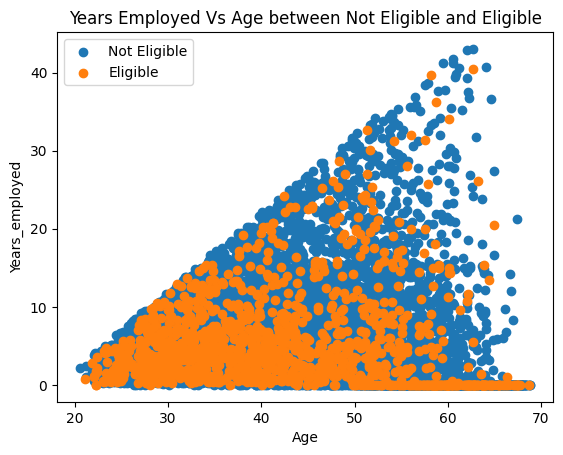

In [24]:
plt.scatter(x=data[data['Target'] == 0]['Age'], y = data[data['Target'] == 0]['Years_employed'])
plt.scatter(x=data[data['Target'] == 1]['Age'], y = data[data['Target'] == 1]['Years_employed'])
plt.xlabel('Age')
plt.ylabel('Years_employed')
plt.legend(['Not Eligible', 'Eligible'])
plt.title('Years Employed Vs Age between Not Eligible and Eligible')

Text(0.5, 1.0, 'Account Length Vs Age between Not Eligible and Eligible')

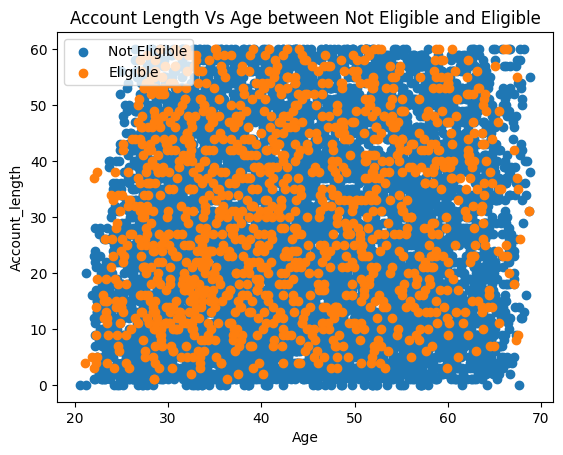

In [25]:
plt.scatter(x=data[data['Target'] == 0]['Age'], y = data[data['Target'] == 0]['Account_length'])
plt.scatter(x=data[data['Target'] == 1]['Age'], y = data[data['Target'] == 1]['Account_length'])
plt.xlabel('Age')
plt.ylabel('Account_length')
plt.legend(['Not Eligible', 'Eligible'])
plt.title('Account Length Vs Age between Not Eligible and Eligible')